<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)


#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [9]:
missing_values = df[['Employment', 'JobSat', 'RemoteWork', 'YearsCodePro']].isnull().sum()
missing_percent = (missing_values / len(df)) * 100

In [56]:
# Fill RemoteWork with the most frequent value (mode)
remote_work_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(remote_work_mode)

df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mean())

df['JobSatPoints_1'] = df['JobSatPoints_1'].fillna(df['JobSatPoints_1'].mean())

# Replace text with numeric equivalents
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

# Convert the column to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].mean())


In [57]:
# Check that missing values are resolved
print(missing_percent)

Employment      0.0
JobSat          0.0
RemoteWork      0.0
YearsCodePro    0.0
dtype: float64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_1437/417293972.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat_by_experience = df.groupby('ExperienceRange')['JobSat'].median()


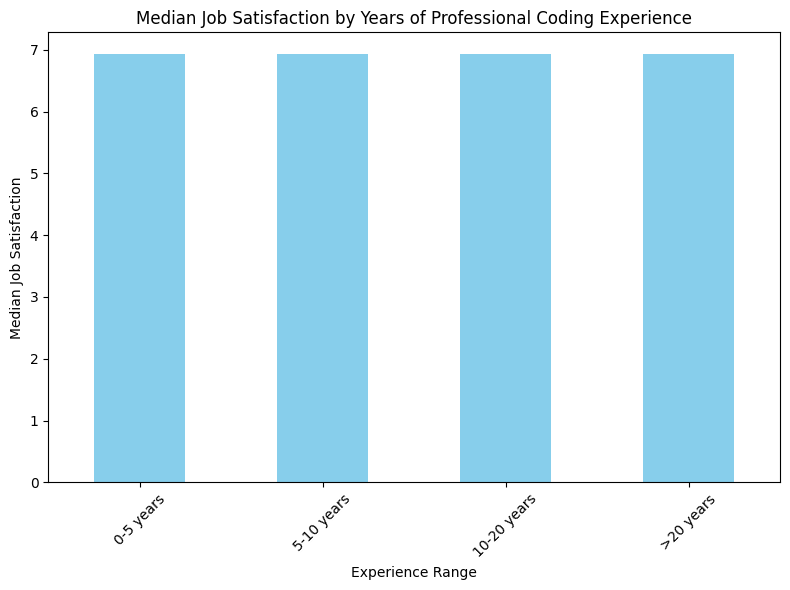

In [58]:
# Create experience ranges for 'YearsCodePro'
bins = [0, 5, 10, 20, df['YearsCodePro'].max()]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate the median JobSat for each experience range
median_job_sat_by_experience = df.groupby('ExperienceRange')['JobSat'].median()

# Visualize the relationship using a bar plot
plt.figure(figsize=(8, 6))
median_job_sat_by_experience.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Experience Range')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_1437/4094767618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='viridis')


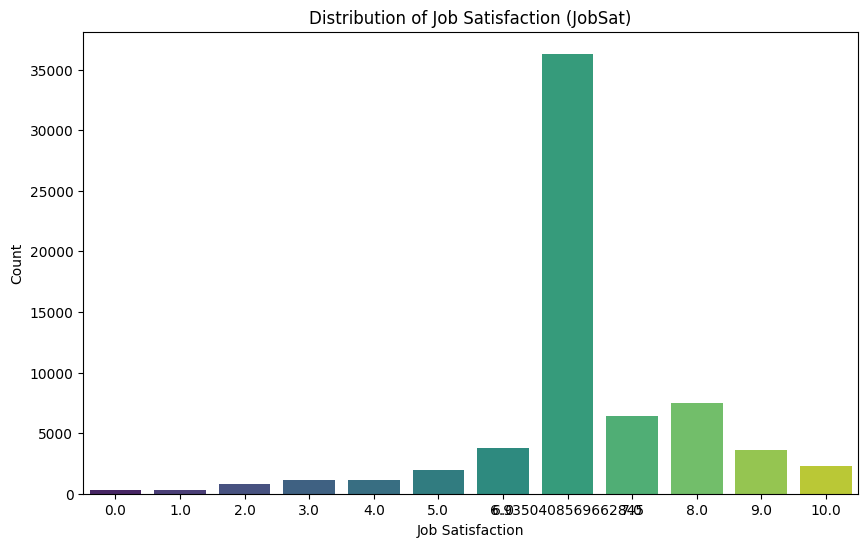

In [59]:
# Create a count plot to visualize the distribution of 'JobSat' values
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df, palette='viridis')
plt.title('Distribution of Job Satisfaction (JobSat)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_1437/2514367193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)
/tmp/ipykernel_1437/2514367193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='Set2')


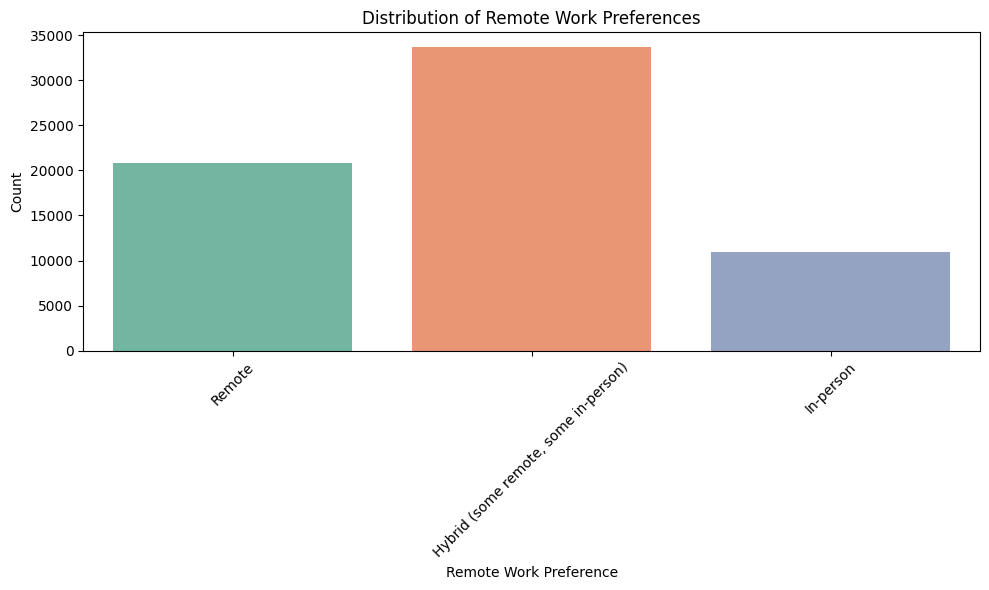

In [60]:
# Impute missing values in 'RemoteWork' column with the most frequent value
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)
#df['RemoteWork'].fillna('NA', inplace=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', palette='Set2')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
df['DevType'].fillna(df['DevType'].mode()[0], inplace=True)
remote_pref_table = pd.crosstab(index=df['DevType'],
                                columns=[df['Employment'], df['RemoteWork']],
                                margins=True, margins_name="Total")

# Display the top 15 job roles by total responses for easier interpretation
remote_pref_table_top = remote_pref_table.sort_values(by="Total", ascending=False).head(15)
remote_pref_table_top


/tmp/ipykernel_1437/2432595915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DevType'].fillna(df['DevType'].mode()[0], inplace=True)


Employment                                                     Employed, full-time  \
RemoteWork                                    Hybrid (some remote, some in-person)   
DevType                                                                              
Total                                                                        17296   
Developer, full-stack                                                         6468   
Developer, back-end                                                           3069   
Student                                                                          8   
Developer, front-end                                                           894   
Developer, desktop or enterprise applications                                  782   
Other (please specify):                                                        540   
Developer, mobile                                                              492   
Developer, embedded applications or devices                                    616   
Engineering manager                                                            523   
Academic researcher                                                            324   
Data engineer                                                                  430   
Data scientist or machine learning specialist                                  386   
DevOps specialist                                                              382   
Research & Development role                                                    331   

Employment                                                      \
RemoteWork                                    In-person Remote   
DevType                                                          
Total                                              8552  13193   
Developer, full-stack                              3467   4937   
Developer, back-end                                1115   3002   
Student                                              24      9   
Developer, front-end                                428    896   
Developer, desktop or enterprise applications       494    451   
Other (please specify):                             338    347   
Developer, mobile                                   277    496   
Developer, embedded applications or devices         444    164   
Engineering manager                                 146    387   
Academic researcher                                 209     43   
Data engineer                                       110    297   
Data scientist or machine learning specialist       126    193   
DevOps specialist                                    78    250   
Research & Development role                         167    154   

Employment                                    Employed, full-time;Employed, part-time  \
RemoteWork                                       Hybrid (some remote, some in-person)   
DevType                                                                                 
Total                                                                              85   
Developer, full-stack                                                              36   
Developer, back-end                                                                17   
Student                                                                             0   
Developer, front-end                                                                4   
Developer, desktop or enterprise applications                                       2   
Other (please specify):                                                             3   
Developer, mobile                                                                   4   
Developer, embedded applications or devices                                         1   
Engineering manager                                                                 1   
Academic researcher                                                                 1   
Data engineer   

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_1437/2132613063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LanguageHaveWorkedWith'].fillna('NA', inplace=True)


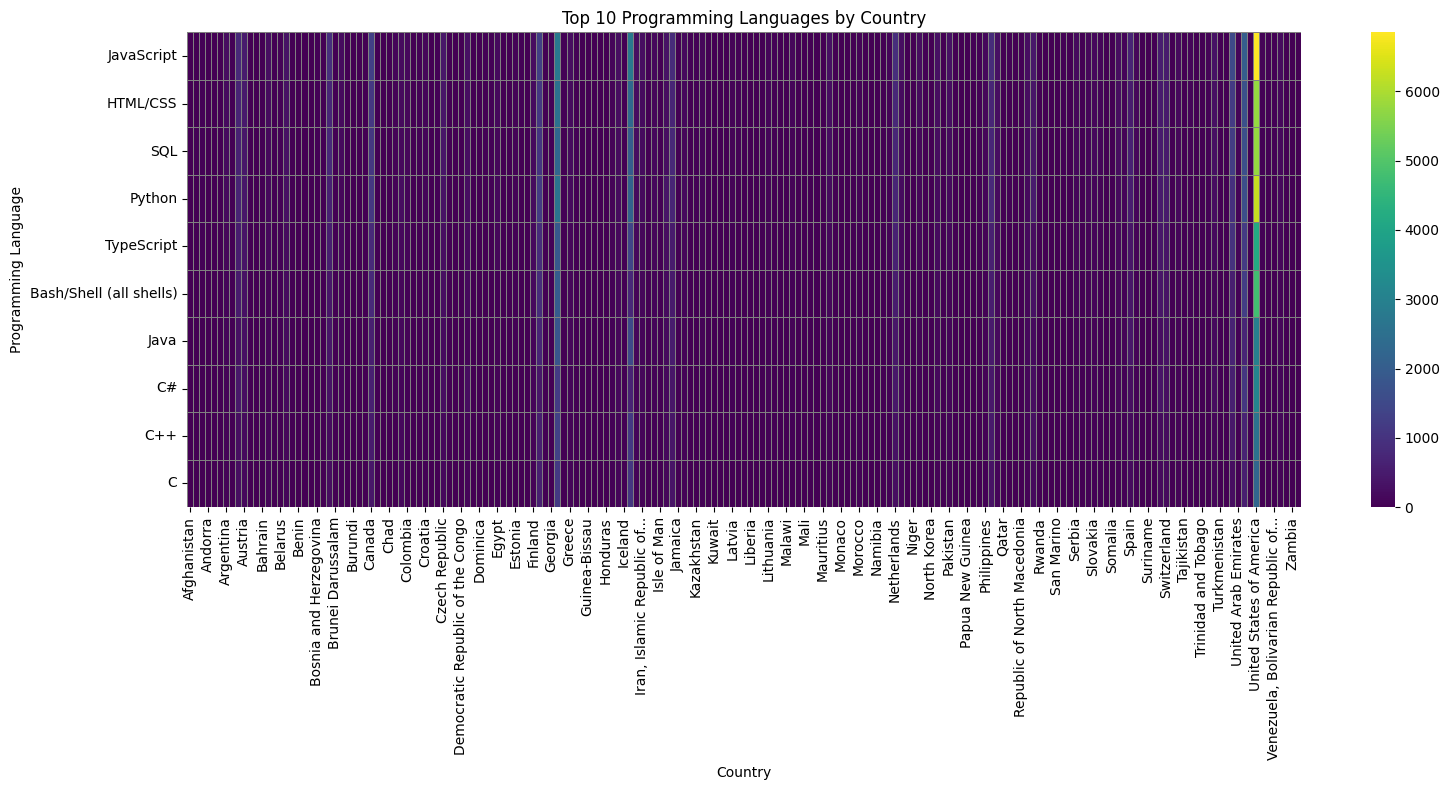

In [62]:
# Step 1: Fill missing values in 'LanguageHaveWorkedWith' with 'NA'
df['LanguageHaveWorkedWith'].fillna('NA', inplace=True)

# Step 2: Filter out rows where no language data is available
lang_df = df[df['LanguageHaveWorkedWith'] != 'NA'][['Country', 'LanguageHaveWorkedWith']].copy()

# Step 3: Split and explode the language data
lang_df['LanguageHaveWorkedWith'] = lang_df['LanguageHaveWorkedWith'].str.split(';')
lang_df = lang_df.explode('LanguageHaveWorkedWith')
lang_df['LanguageHaveWorkedWith'] = lang_df['LanguageHaveWorkedWith'].str.strip()

# Step 4: Group by country and language, count occurrences
lang_counts = lang_df.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Step 5: Pivot the data to prepare for heatmap
heatmap_data = lang_counts.pivot_table(index='LanguageHaveWorkedWith', columns='Country', values='Count', fill_value=0)

# Select top 10 languages overall for clarity in visualization
top_languages = heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index
heatmap_top = heatmap_data.loc[top_languages]

# Step 6: Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_top, cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Top 10 Programming Languages by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


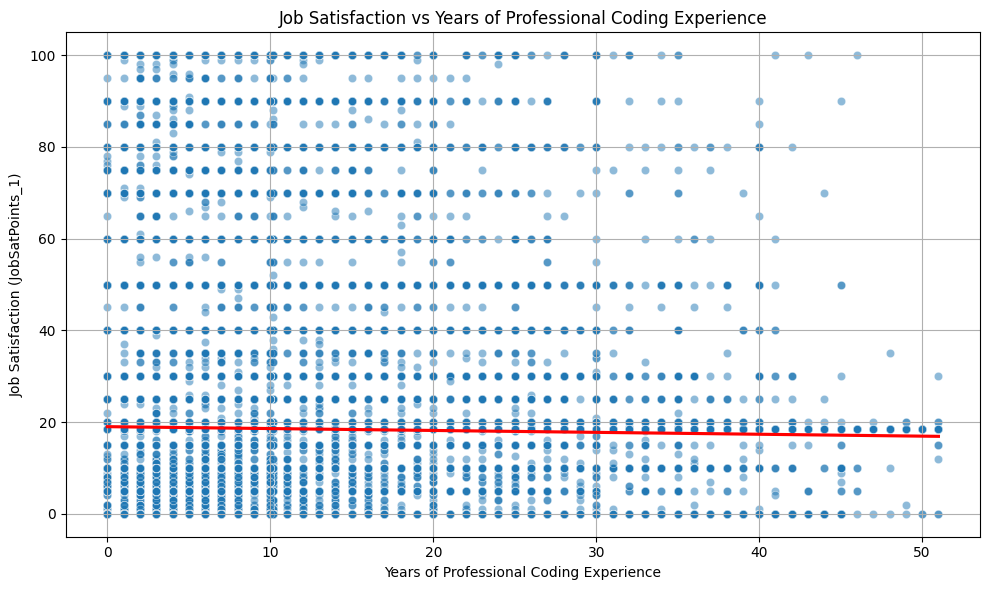

In [65]:
# Drop rows with missing values
scatter_data = df[['YearsCodePro', 'JobSatPoints_1']]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
sns.regplot(data=scatter_data, x='YearsCodePro', y='JobSatPoints_1', scatter=False, color='red', ci=None)

plt.title('Job Satisfaction vs Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_1437/261462422.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


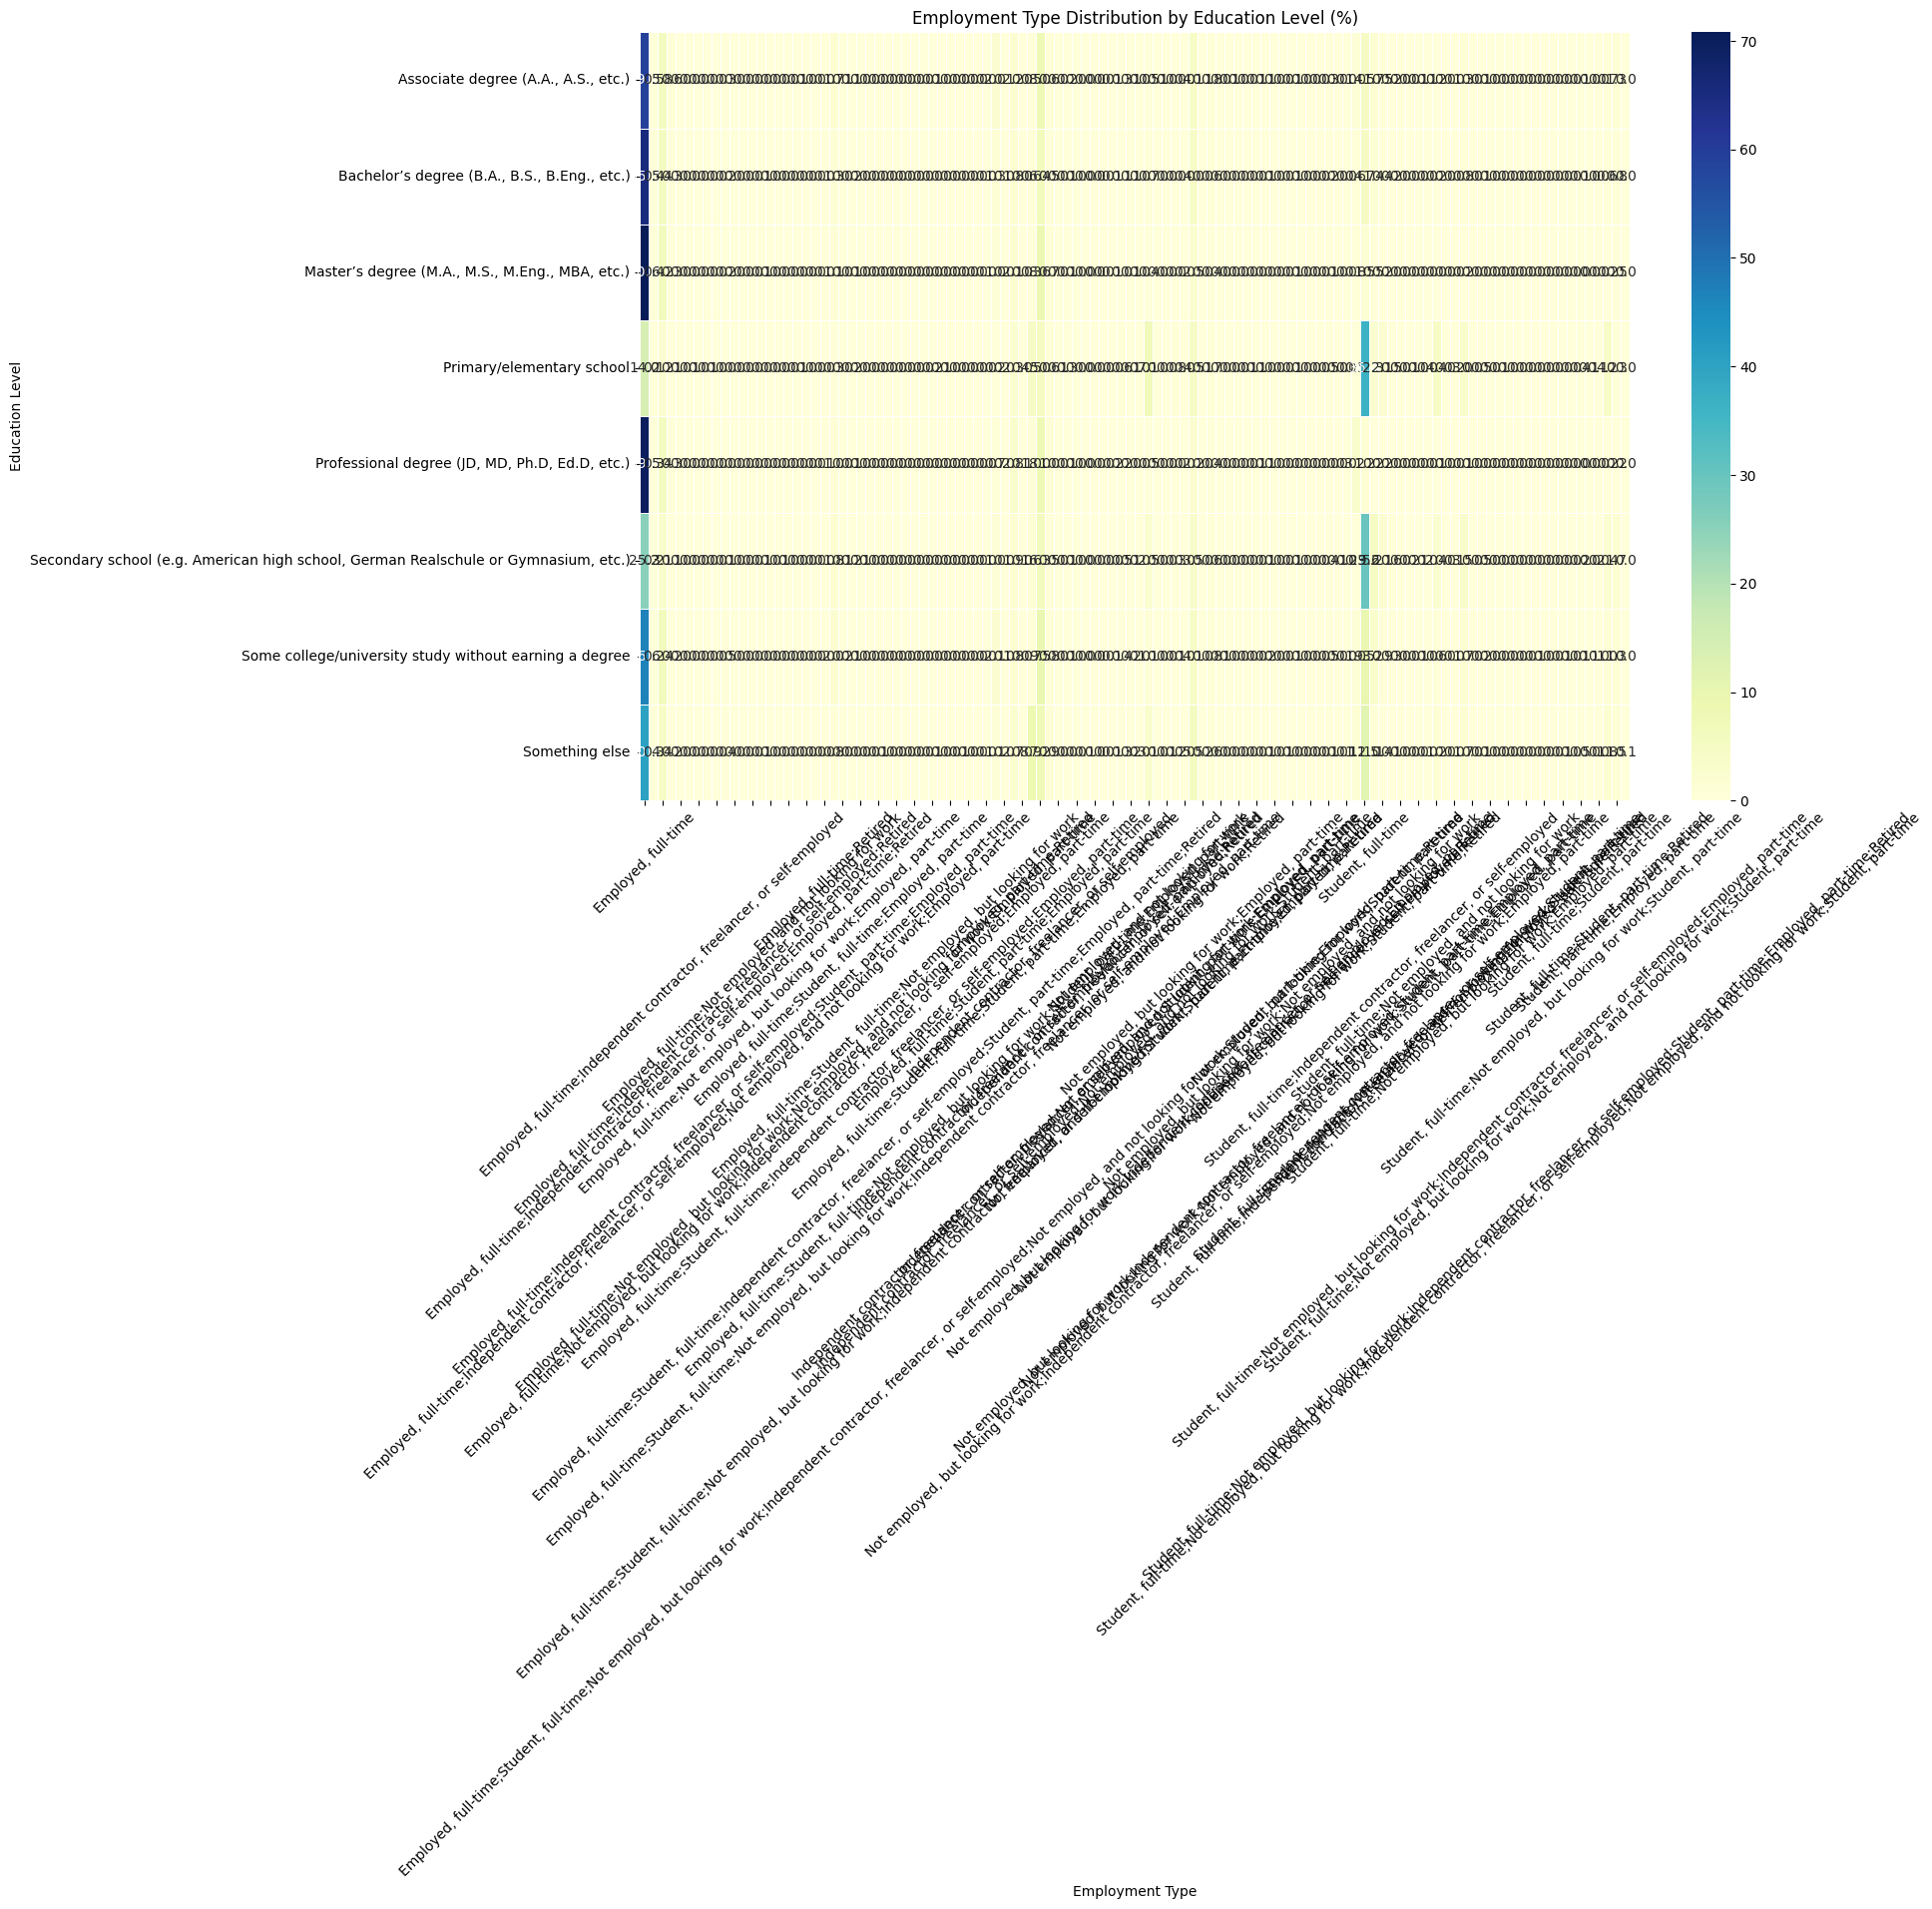

In [71]:
# Fill missing values in 'EdLevel' with the most frequent (mode) value
df['EdLevel'].fillna(df['EdLevel'].mode()[0], inplace=True)
# Cross-tabulation
edu_emp_crosstab = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100
edu_emp_crosstab = edu_emp_crosstab.round(1)
edu_emp_crosstab.head()


plt.figure(figsize=(16, 10))
sns.heatmap(edu_emp_crosstab, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('Employment Type Distribution by Education Level (%)')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
df.to_csv("cleaned_analyzed_survey_data.csv", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
